In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
sns.set_style('darkgrid')

In [3]:
%matplotlib inline

In [6]:
# loading the .xlsx to a pandas dataframe
vessel_df = pd.read_excel('particulars_dataset_jda_assignment.xlsx')

## EDA

In [7]:
vessel_df.head(5)

,IMO,SHIP_ID,TEU,PORT_NAME,TIMESTAMP
0,9784269,5098185,15226,A,2019-01-01
1,9795622,5640800,21237,A,2019-01-01
2,9811000,5631605,20000,A,2019-01-01
3,9619983,157413,18270,A,2019-01-02
4,9695121,994728,19000,B,2019-01-02


In [8]:
vessel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   IMO        1202 non-null   int64         
 1   SHIP_ID    1202 non-null   int64         
 2   TEU        1202 non-null   int64         
 3   PORT_NAME  1202 non-null   object        
 4   TIMESTAMP  1202 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.1+ KB


Our dataset consists of 5 columns and 1202 rows. The row names are **IMO**, **SHIP_ID**, **TEU**, **PORT_NAME**, and **TIMESTAMP**.<br>

In more details:

1. **IMO**: refers to the IMO number of ships which is a unique identifier for ships
2. **SHIP_ID**: probably refers to a unique identifier set by marine traffic
3. **TEU**: stands for twenty-foot equivalent unit, and refers to the cargo capacity of a container vessel, meaning how many TEU a container vessel could carry.
4. **PORT_NAME**: refers to the 4 container ports
5. **TIMESTAMP**: refers to the date of arrival of the Ultra large container vessels

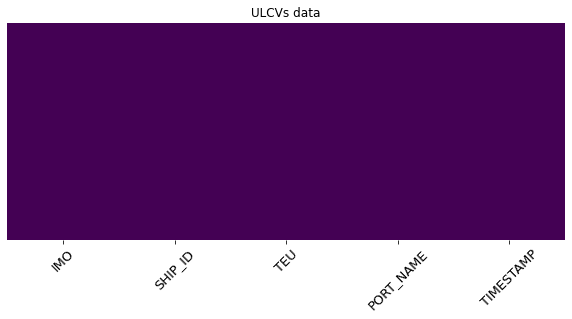

In [23]:
# checking for missing values
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(vessel_df.isnull(),yticklabels=False,cbar=False,cmap='viridis', ax = ax1)
ax1.tick_params(axis='x', labelsize=13, rotation = 45)
ax1.set_title('ULCVs data');

In [22]:
vessel_df.isnull().sum()

IMO          0
SHIP_ID      0
TEU          0
PORT_NAME    0
TIMESTAMP    0
dtype: int64

**There are no missing values in our data set**

In [81]:
# checking for duplicate rows
vessel_df.duplicated(keep=False).sum()

0

**All rows are unique**

### IMO feature

In [54]:
vessel_df.duplicated(subset=['IMO'], keep=False).sum()

1198

In [57]:
(~vessel_df.duplicated(subset=['IMO'], keep=False)).sum()

4

In [58]:
vessel_df['IMO'].nunique()

173

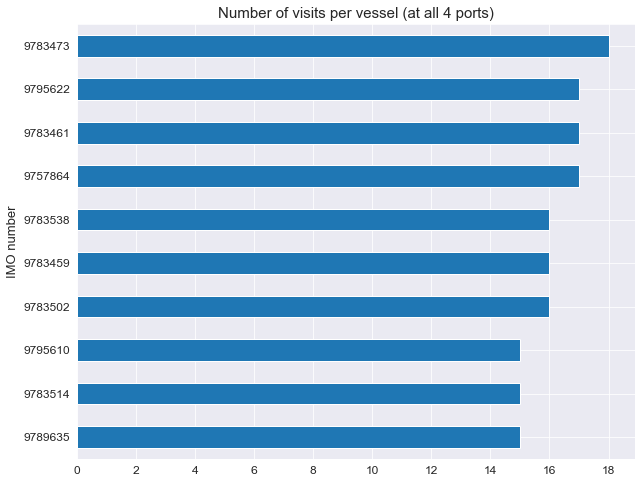

In [71]:
fig = plt.figure(figsize=(10,8))
vessel_df['IMO'].value_counts( ascending=True).iloc[-10:].plot(kind='barh')
plt.xticks(np.arange(0,20,2), fontsize=12)
plt.title('Number of visits per vessel (at all 4 ports)', fontsize=15)
plt.ylabel('IMO number', fontsize=13)
plt.yticks(fontsize=12);

From the above we notice the following:

1. There are 173 unique ULCVs.
2. Only 4 ULCVs have visited those ports only once.
3. There 4 ULCVs which have visited thise ports a least 17 times.

#### TEU feature

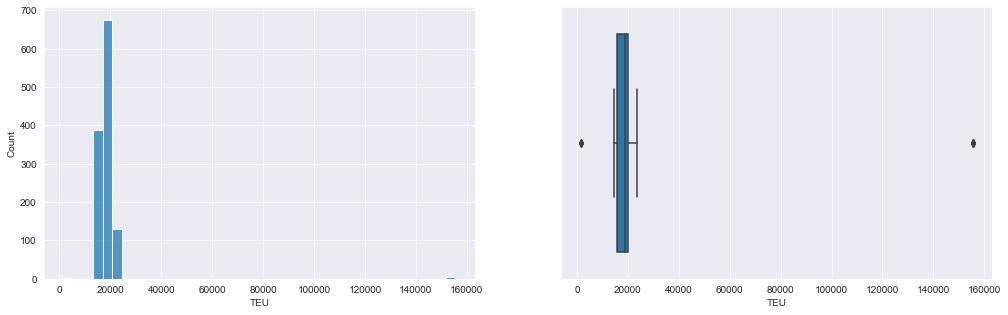

In [74]:
fig, axes = plt.subplots(1,2,figsize=(17,5))
sns.histplot(data = vessel_df, 
             x= 'TEU',  
             element='bars',
             stat='count',
            bins=40,
            ax=axes[0])
sns.boxplot(data = vessel_df, x = 'TEU',ax=axes[1]);

In [75]:
vessel_df['TEU'].describe()

count      1202.000000
mean      18756.699667
std        9186.091153
min        1555.000000
25%       15908.000000
50%       18800.000000
75%       20000.000000
max      155500.000000
Name: TEU, dtype: float64

In [94]:
# the below lambda functions can help us count how many outliners we have in this column. 
# I consider as an outliner a value which its absolute difference from the mean value of the TEU column is greater than 3 standard diviations
# However since we have a very large max value (155,000), while the majority of our data our centered within, it affects our mean value, so maybe not outliners could be spotted 
outliners = vessel_df['TEU'].apply(lambda x: True if np.abs(x - vessel_df['TEU'].mean()) > 3*vessel_df['TEU'].std() else False)
outliners.sum()

5

There are only 5 outliners. Since the dataset contains only ULCVs, there cannot be container vessles with 1,555 TEUs (min value). Also the max value of 155,500 TEUs is not feaseble.
We can suppose that fo both the lowest value for the max value some zeros had been misstyped.

There are many ways we could deal with those outliners.

1. We can simple drop those 5 rows, since there are very few and will not affect our data set.
2. We can replace them with the mean value of the TEU column, or even better with the mean value of TEU group by the port they have visited. Its common depending the vessel particulars, some vessel cannot visit all the ports.
3. Since there are many vessels appear more than one time in our data set, it is possible that their TEU values to had been misstyped just once, thus we could try to look and replace the outliners with their correct values

In [97]:
# return the IMO numbers of the outliners
# we are going to use the outliners variable as a mask
vessel_df[outliners]

,IMO,SHIP_ID,TEU,PORT_NAME,TIMESTAMP
215,9321495,160793,155500,B,2019-02-20
380,9321495,160793,155500,A,2019-03-31
423,9321495,160793,155500,B,2019-04-09
649,9321495,160793,155500,C,2020-01-22
859,9321495,160793,155500,B,2020-02-29


In [85]:
vessel_df[vessel_df['IMO']==9321495]

,IMO,SHIP_ID,TEU,PORT_NAME,TIMESTAMP
215,9321495,160793,155500,B,2019-02-20
380,9321495,160793,155500,A,2019-03-31
423,9321495,160793,155500,B,2019-04-09
649,9321495,160793,155500,C,2020-01-22
859,9321495,160793,155500,B,2020-02-29


Unfortunetely we notice that all the records of the vessel with IMO number 9321495 have been misstyped 

In [89]:
vessel_df[vessel_df['TEU']<10000]

,IMO,SHIP_ID,TEU,PORT_NAME,TIMESTAMP
276,9321483,160663,1555,B,2019-03-05
906,9321483,160663,1555,A,2020-03-10
1116,9321483,160663,1555,C,2020-04-15


In [95]:
vessel_df[vessel_df['IMO']==9321483]

,IMO,SHIP_ID,TEU,PORT_NAME,TIMESTAMP
276,9321483,160663,1555,B,2019-03-05
906,9321483,160663,1555,A,2020-03-10
1116,9321483,160663,1555,C,2020-04-15


Unfortunetely we notice that all the records of the vessel with IMO number 9321483 have been misstyped 

In that case we would try to replace the TEU value with the mean TEU value group by PORT_NAME (after excluded the outliners from the calculation of the mean)

In [116]:
mean_teu_per_port = vessel_df[~((vessel_df['IMO']==9321483) | (vessel_df['IMO']==9321495))].groupby(by='PORT_NAME').mean()['TEU']
mean_teu_per_port

PORT_NAME
A    18313.301818
B    18166.634921
C    18040.973404
D    18363.858974
Name: TEU, dtype: float64

In [127]:
def my_f(x,y):
    if (x > 30000) or (x < 10000):
        if y == 'A':
            return round(mean_teu_per_port['A'])
        if y == 'B':
            return round(mean_teu_per_port['B'])
        if y == 'C':
            return round(mean_teu_per_port['C'])
        if y == 'D':
            return round(mean_teu_per_port['D'])
    else:
        return x     

In [132]:
vessel_df['TEU'] = vessel_df[['TEU','PORT_NAME']].apply(lambda row: my_f(row['TEU'], row['PORT_NAME']), axis=1)

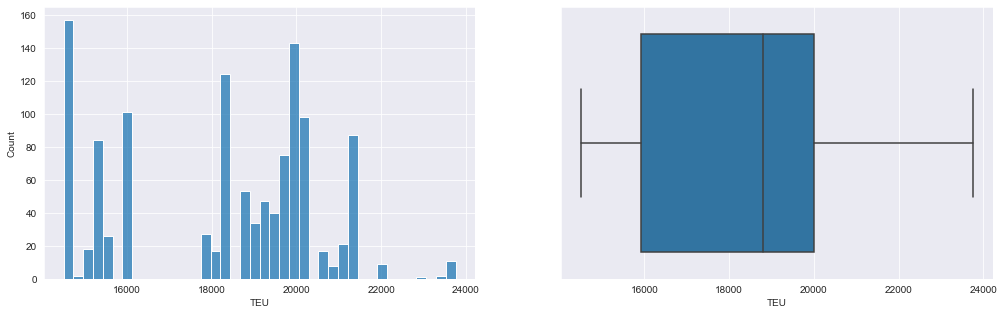

In [133]:
fig, axes = plt.subplots(1,2,figsize=(17,5))
sns.histplot(data = vessel_df, 
             x= 'TEU',
             element='bars',
             stat='count',
            bins=40,
            ax=axes[0])
sns.boxplot(data = vessel_df, x = 'TEU',ax=axes[1]);

In [134]:
vessel_df['TEU'].describe()

count     1202.000000
mean     18226.925125
std       2349.485266
min      14500.000000
25%      15908.000000
50%      18800.000000
75%      20000.000000
max      23756.000000
Name: TEU, dtype: float64